In [22]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [23]:
file_path = 'C:/Users/andre/OneDrive/Documentos/GitHub/DataMining_G31/Data/DM2425_ABCDEats_DATASET.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path)
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
import sys
import os

# Add parent directory (one level up) to the path
sys.path.append(os.path.abspath(os.path.join('..')))

# Now you should be able to import from the Functions folder
from Functions.CleanUp import cleanUp

In [25]:
# Now you can call the function
df, columns_dict = cleanUp(df)

-----------looking for incostisencies -----------
There are repeated values in the dataset
      customer_id customer_region  customer_age  vendor_count  product_count  \
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  \
20855         0         35.0          35          -           CARD   
20907         0         35.0          35          -           CARD   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
20855           0.0        0.0            0.0       0.0                 0.0   
20907           0.0        0.0            0.0       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
20855          0.0           0.0          0.0         0.0          0.0   
20907          0.0           0.0          0.0         0.0          0.0 

In [26]:
df["Recency"] = 90 - df["last_order"]

In [27]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,used_promo,delta_day_order,tot_value_cui,order_freq,value_freq,avg_order_value,Recency
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,True,2.0,28.88,2.500000,14.440,5.776,89
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,True,2.0,19.21,1.000000,9.605,9.605,89
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,True,2.0,9.20,1.000000,4.600,4.600,89
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,True,3.0,31.56,1.000000,10.520,10.520,88
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,No_Promo,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,3.0,55.44,1.666667,18.480,11.088,88


# 3. Descriptive Statistics for Recency Feature
##### Objective: Summarize the key characteristics of the Recency feature.

In [28]:
df['Recency'].value_counts()

Recency
1     1713
2     1440
6     1219
3     1176
7     1116
      ... 
87      85
86      78
88      64
89      56
0       32
Name: count, Length: 91, dtype: int64

In [29]:
df["Recency"].isnull().sum()

0

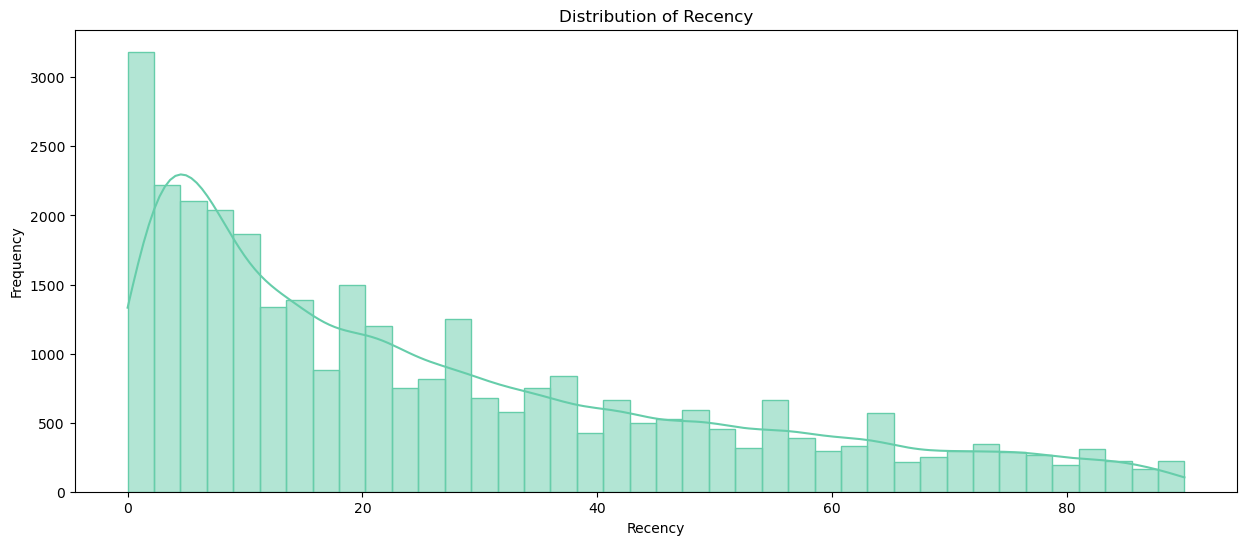

In [42]:
plt.figure(figsize=(15, 6))  

sns.histplot(df['Recency'], bins=40, kde=True, color='mediumaquamarine', edgecolor='mediumaquamarine')

 
# Adding labels and title
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Distribution of Recency')
 
# Display the plot
plt.show()

As we can conclude from the figure, the recency of our customers shows a favorable distribution. There are significantly more customers who have made orders recently compared to those who haven't placed an order in several days.
Note: Shorter recency could indicate more recent engagement, but it doesn't tell us how often they purchase or how much they spend.

In [31]:
grouped_df = df.groupby(['Recency']).agg({'delta_day_order':'mean', 'tot_value_cui': 'mean'}).reset_index()
grouped_df

,Recency,delta_day_order,tot_value_cui
0,0,58.156250,34.917500
1,1,61.569761,71.632388
2,2,60.143056,67.544132
3,3,59.181122,63.277925
4,4,56.462715,59.058480
...,...,...,...
86,86,1.538462,17.251154
87,87,1.341176,16.957294
88,88,1.171875,12.034531
89,89,1.053571,12.721786


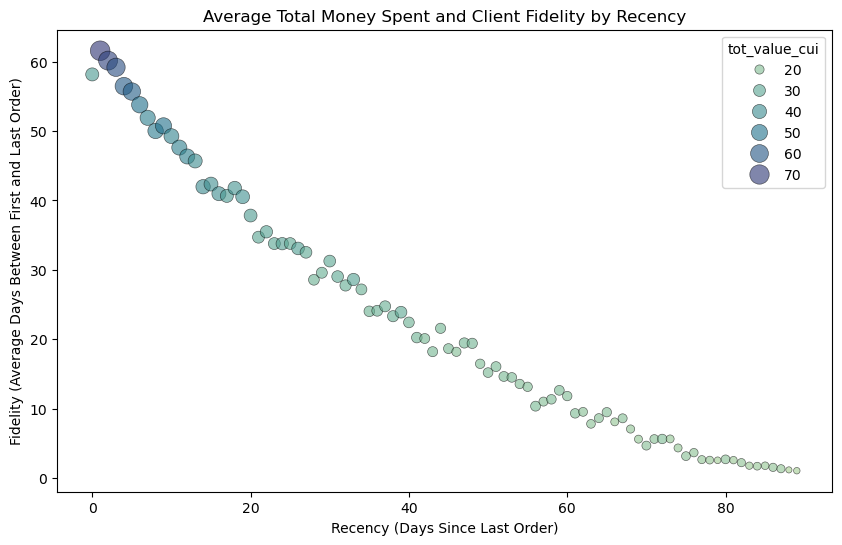

In [46]:
# Create the figure
plt.figure(figsize=(10, 6))

# Create a scatter plot (bubble plot) with averages of Total Money Spent
sns.scatterplot(
    x='Recency', 
    y='delta_day_order', 
    size='tot_value_cui',  # Bubble size based on the average money spent
    hue='tot_value_cui',  # Optional: Color based on average money spent
    data=grouped_df, 
    sizes=(20, 200),  # Control bubble size range
    palette='crest',  # Color palette
    alpha=0.6,  # Transparency
    edgecolor="black"  # Border color of bubbles
)

# Adding labels and title
plt.xlabel('Recency (Days Since Last Order)')
plt.ylabel('Fidelity (Average Days Between First and Last Order)')
plt.title('Average Total Money Spent and Client Fidelity by Recency')

# Show the plot
plt.show()

Customers who haven't purchased for a long time on average tend to have a longer loyalty period, and they also spend the most on average. On the other hand, customers who haven't purchased in a long time are those who spend the least on average and also have the shortest loyalty period.

Long-term Loyalty and High Spending: Customers with a long period of inactivity but who have been loyal for a long time are likely high-value customers. They may represent valuable long-term relationships that businesses should try to re-engage. They spend more on average, so targeted efforts to bring them back could be worthwhile.

Churn Risk for Inactive Customers: The second group—those who haven’t purchased in a long time and have a short loyalty period—are more likely at risk of churn. They haven't established a strong relationship with the brand, and their lower spending suggests they are less engaged overall. These customers might require different strategies, such as incentives or personalized offers, to boost their loyalty.

The distinction between these two groups suggests that different engagement tactics should be employed. High-value, long-term customers might respond well to exclusive offers or personalized reactivation campaigns, while newer, less-engaged customers might need more aggressive promotions or educational efforts to boost their interest and commitment.

### Lets add the delta_day_order to the equation

We know the last time the clients bought a product, but that doesnt mean they are not going to buy again. So you are also analyse the their time with the company 

In [33]:
grouped_df2 = df.groupby(['Recency']).agg({'delta_day_order':'mean', 'order_freq': 'mean'}).reset_index()
grouped_df2

,Recency,delta_day_order,order_freq
0,0,58.156250,0.242152
1,1,61.569761,0.291308
2,2,60.143056,0.282369
3,3,59.181122,0.257863
4,4,56.462715,0.281460
...,...,...,...
86,86,1.538462,1.412179
87,87,1.341176,1.399020
88,88,1.171875,1.156250
89,89,1.053571,1.294643


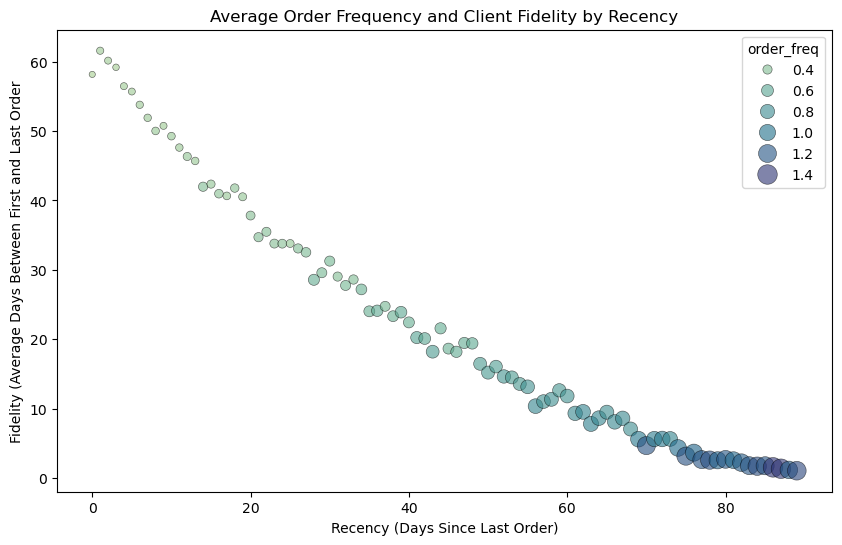

In [49]:
# Create the figure
plt.figure(figsize=(10, 6))

# Create a scatter plot (bubble plot) with averages of Total Money Spent
sns.scatterplot(
    x='Recency', 
    y='delta_day_order', 
    size='order_freq',  # Bubble size based on the average money spent
    hue='order_freq',  # Optional: Color based on average money spent
    data=grouped_df2, 
    sizes=(20, 200),  # Control bubble size range
    palette='crest',  # Color palette
    alpha=0.6,  # Transparency
    edgecolor="black"  # Border color of bubbles
)

# Adding labels and title
plt.xlabel('Recency (Days Since Last Order)')
plt.ylabel('Fidelity (Average Days Between First and Last Order')
plt.title('Average Order Frequency and Client Fidelity by Recency')

# Show the plot
plt.show()

Customers who haven’t purchased for a long time tend to have a shorter loyalty period on average, but during that short loyalty period, they place orders more frequently

## Conclusion

Customers who haven't placed an order in a long time generally have shorter loyalty periods, spend less money, but place orders more frequently. In other words, within their shorter loyalty period, they place orders more often.

Customers who have placed orders more recently, on average, have longer loyalty periods, spend more money, and place orders less frequently.

##### Key Insights (Summary):

Short loyalty periods: These customers place orders more frequently but tend to spend less and have a shorter relationship with the company.

Long loyalty periods: These customers place orders less frequently but spend more and maintain a longer-lasting relationship with the company.

Inverse relationship: Frequency of orders tends to decrease as customer loyalty and spending increase.

